In [1]:
# Financial Statements Analysis Project

# Overview
# This project analyzes financial statements for major companies (e.g., AAPL, MSFT, AMZN) to derive key insights on profitability, liquidity, and cash flow trends. It demonstrates data cleaning, EDA, metric calculation, and visualization skills essential for junior data/business analyst roles.

# Business Value
# - Identify trends in ROI, ROE, and cash flows to support investment decisions or risk assessments.
# - Skills showcased: Python (pandas, seaborn), financial KPI analysis, trend forecasting.

# Dataset
# - Source: `Financial Statements.csv` (company financials from 2009-2023).
# - Key Columns: Revenue, Net Income, ROE, ROA, Cash Flows, etc.

# Setup Instructions
# 1. Ensure `Financial Statements.csv` is in the same directory as this notebook.
# 2. Run the next cell to install dependencies if not already installed: `pip install pandas matplotlib seaborn` in a terminal.
# 3. Execute cells in order.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
# Load dataset with error handling
file_path = "Financial Statements.csv"  # Update this path if the file is elsewhere
try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully. Shape:", df.shape)
    print("First few rows:\n", df.head())
except FileNotFoundError:
    print("Error: 'Financial Statements.csv' not found. Please place the file in the current directory or update the file_path variable.")
except Exception as e:
    print(f"An error occurred: {e}")

Data loaded successfully. Shape: (161, 23)
First few rows:
    Year Company  Category  Market Cap(in B USD)   Revenue  Gross Profit  \
0  2022     AAPL       IT               2066.94  394328.0      170782.0   
1  2021     AAPL       IT               2913.28  365817.0      152836.0   
2  2020     AAPL       IT               2255.97  274515.0      104956.0   
3  2019     AAPL       IT               1304.76  260174.0       98392.0   
4  2018     AAPL       IT                748.54  265595.0      101839.0   

   Net Income  Earning Per Share    EBITDA  Share Holder Equity  ...  \
0     99803.0               6.11  130541.0              50672.0  ...   
1     94680.0               5.61  120233.0              63090.0  ...   
2     57411.0               3.28   77344.0              65339.0  ...   
3     55256.0               2.97   76477.0              90488.0  ...   
4     59531.0               2.98   81801.0             107147.0  ...   

   Current Ratio  Debt/Equity Ratio       ROE      ROA  

In [4]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Impute missing Market Cap with median (noting it's an assumption)
if df['Market Cap(in B USD)'].isnull().sum() > 0:
    median_market_cap = df['Market Cap(in B USD)'].median()
    df['Market Cap(in B USD)'] = df['Market Cap(in B USD)'].fillna(median_market_cap)
    print(f"Imputed missing Market Cap with median: {median_market_cap}")

# Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')  # 'coerce' handles invalid parsing
print("Year column converted to datetime. Sample:", df['Year'].head())

# Calculate Total Cash Flow
df['Total Cash Flow'] = (df['Cash Flow from Operating'] + 
                        df['Cash Flow from Investing'] + 
                        df['Cash Flow from Financial Activities'])
print("Total Cash Flow calculated.")

# Export cleaned data
df.to_csv('cleaned_financial_data.csv', index=False)
print("Cleaned data exported to 'cleaned_financial_data.csv'.")

Missing Values:
 Year                                   0
Company                                0
Category                               0
Market Cap(in B USD)                   1
Revenue                                0
Gross Profit                           0
Net Income                             0
Earning Per Share                      0
EBITDA                                 0
Share Holder Equity                    0
Cash Flow from Operating               0
Cash Flow from Investing               0
Cash Flow from Financial Activities    0
Current Ratio                          0
Debt/Equity Ratio                      0
ROE                                    0
ROA                                    0
ROI                                    0
Net Profit Margin                      0
Free Cash Flow per Share               0
Return on Tangible Equity              0
Number of Employees                    0
Inflation Rate(in US)                  0
dtype: int64
Imputed missing Market Cap 

In [5]:
# Summary statistics
print("Summary Statistics:\n", df.describe())

Summary Statistics:
                                 Year  Market Cap(in B USD)        Revenue  \
count                            161            161.000000     161.000000   
mean   2015-08-11 11:37:38.385093120            336.210124   75862.600758   
min              2009-01-01 00:00:00              0.040000    3326.445000   
25%              2012-01-01 00:00:00             41.280000   22820.400000   
50%              2016-01-01 00:00:00            113.140000   45992.040000   
75%              2019-01-01 00:00:00            356.310000   77849.000000   
max              2023-01-01 00:00:00           2913.280000  513983.000000   
std                              NaN            539.699219   90786.895983   

        Gross Profit    Net Income  Earning Per Share         EBITDA  \
count     161.000000    161.000000         161.000000     161.000000   
mean    37383.463124  12276.607076           0.982886   20174.023974   
min      1174.269000 -12244.000000         -90.480000   -6860.000000 

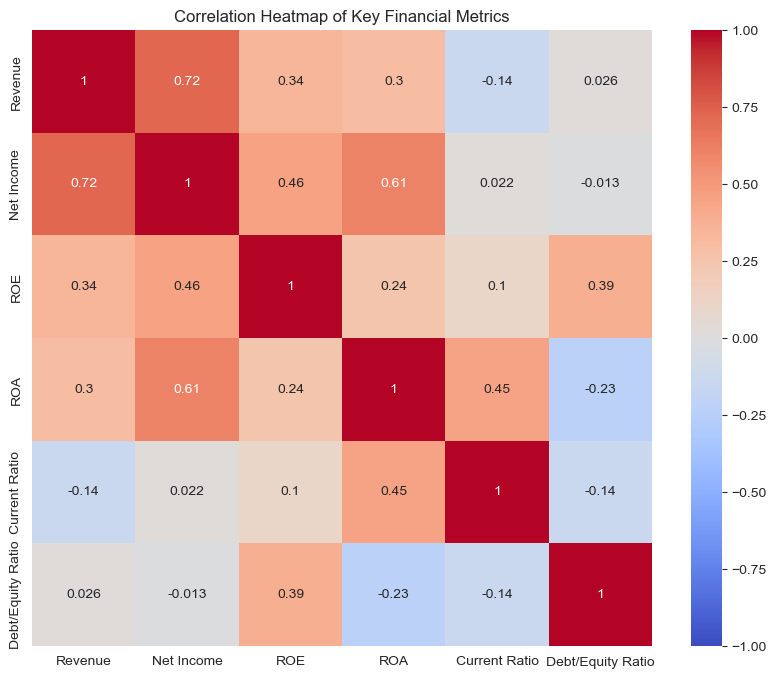

In [6]:
# Correlation heatmap for key financial metrics
corr_cols = ['Revenue', 'Net Income', 'ROE', 'ROA', 'Current Ratio', 'Debt/Equity Ratio']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Financial Metrics')
plt.show()

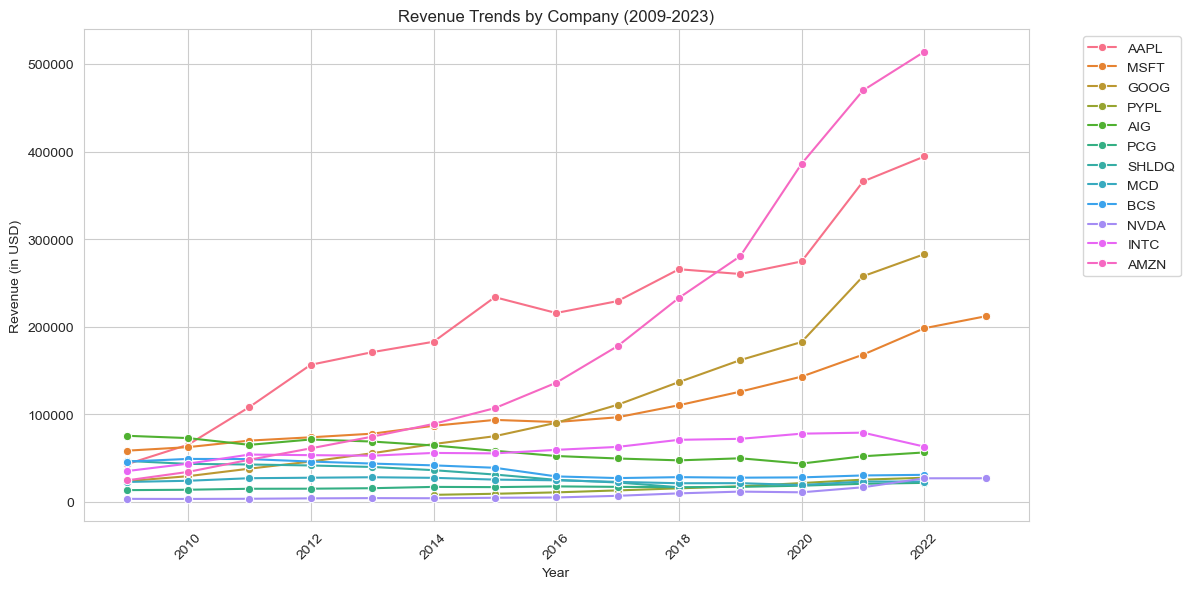

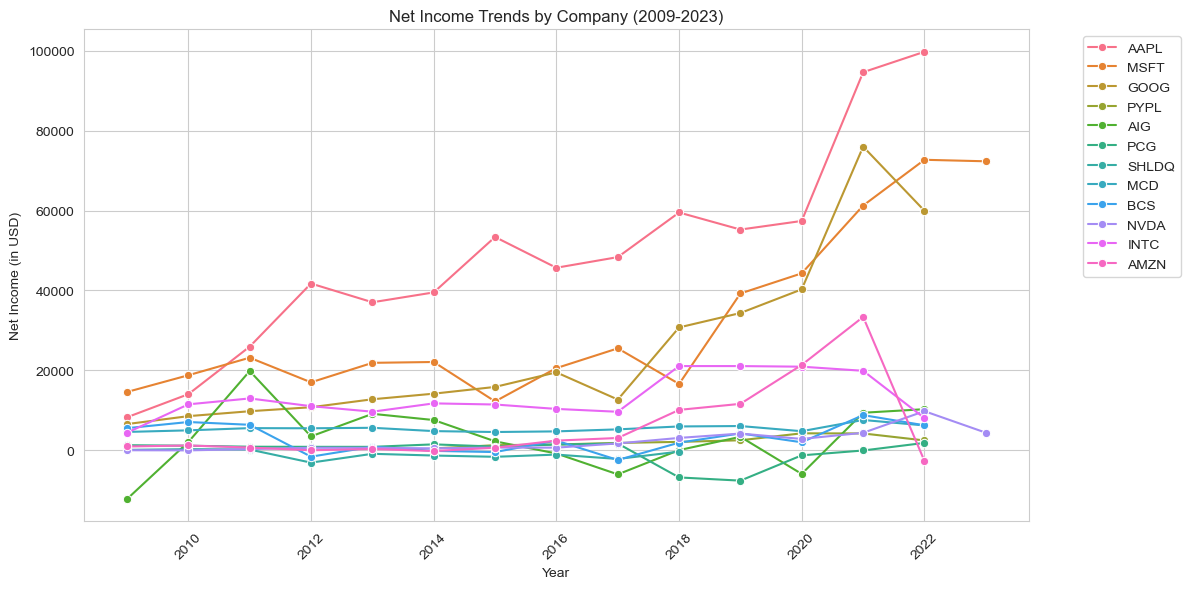

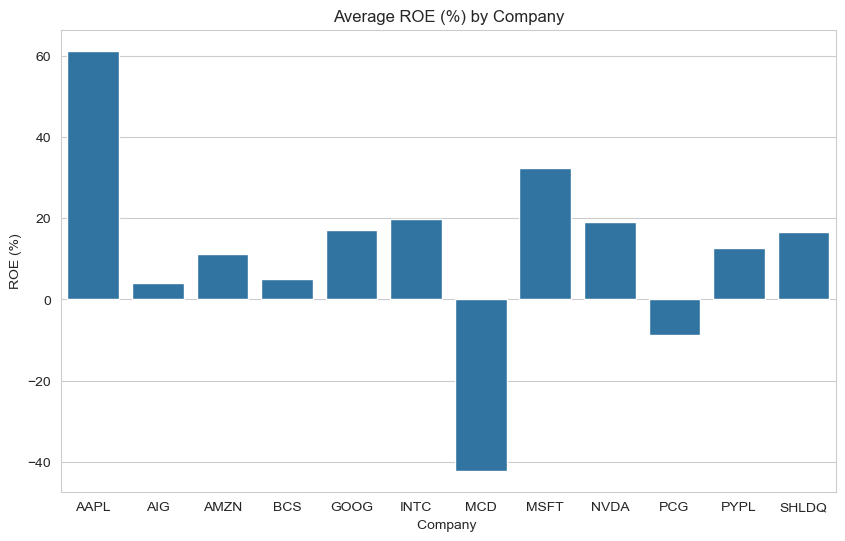

In [7]:
# Trend: Revenue and Net Income over time by Company
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Revenue', hue='Company ', marker='o')
plt.title('Revenue Trends by Company (2009-2023)')
plt.ylabel('Revenue (in USD)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Net Income', hue='Company ', marker='o')
plt.title('Net Income Trends by Company (2009-2023)')
plt.ylabel('Net Income (in USD)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar plot: Average ROE by Company
avg_roe = df.groupby('Company ')[['ROE']].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_roe, x='Company ', y='ROE')
plt.title('Average ROE (%) by Company')
plt.ylabel('ROE (%)')
plt.show()

In [8]:
# Key Insights & Recommendations

# - **Profitability Trends**: Companies like AAPL show consistent ROE growth (e.g., 66% in 2022), indicating strong shareholder returns. AMZN exhibits volatile net income, possibly due to high investments.
# - **Liquidity & Solvency**: High Debt/Equity ratios (e.g., >1 for AAPL in 2022) signal potential risk; monitor closely.
# - **Cash Flow Analysis**: Positive operating cash flow across most companies supports operational health, but negative investing cash flow suggests heavy capital expenditure.

# **Business Recommendations**:
# - For investors: Prioritize firms with ROE >20% (e.g., MSFT, AAPL in recent years).
# - For companies: Reduce debt if Debt/Equity >1 to improve solvency.
# - Next Steps: Integrate SQL for querying (e.g., `SELECT AVG(ROE) FROM financials GROUP BY Company`) or use scikit-learn for revenue forecasting.